# Implement the MNIST dataset using a CNN model

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import datasets,layers,Model



In [3]:
data=datasets.mnist.load_data()
print(data)
(x_train,y_train),(x_test,y_test)=data
print(y_train)

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

In [4]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

print(y_train[0])
y_train.shape

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


(60000, 10)

In [48]:
input=tf.keras.Input(shape=(28,28,1),batch_size=128,name='input')
conv=layers.Conv2D(16,3,strides=(1,1),padding='same',activation='relu',data_format='channels_last',dilation_rate=(1,1),use_bias=True)(input)
layer1=layers.Flatten()(conv)
layerint=layers.Dense(1000,activation='relu')(layer1)
layer2=layers.Dense(128,activation='relu')(layerint)
output=layers.Dense(10,activation='softmax')(layer2)
model=tf.keras.Model(input,output)
model.summary()




Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (128, 28, 28, 1)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (128, 28, 28, 16)      │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (128, 12544)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (128, 1000)            │    12,545,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (128, 128)             │       128,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (128, 10)              │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,674,578 (48.35 MB)

 Trainable params: 12,674,578 (48.35 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

In [50]:
modelfit_data=model.fit(x_train,y_train,batch_size=128,epochs=10,validation_split=0.1,verbose=1)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 119s 272ms/step - accuracy: 0.0991 - loss: 0.1800 - val_accuracy: 0.0992 - val_loss: 0.1802
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 103s 245ms/step - accuracy: 0.0977 - loss: 0.1805 - val_accuracy: 0.0992 - val_loss: 0.1802
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 117s 277ms/step - accuracy: 0.0996 - loss: 0.1801 - val_accuracy: 0.0992 - val_loss: 0.1802
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 108s 256ms/step - accuracy: 0.0970 - loss: 0.1806 - val_accuracy: 0.0992 - val_loss: 0.1802
Epoch 5/10
242/422 ━━━━━━━━━━━━━━━━━━━━ 45s 255ms/step - accuracy: 0.0973 - loss: 0.1805

KeyboardInterrupt: 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


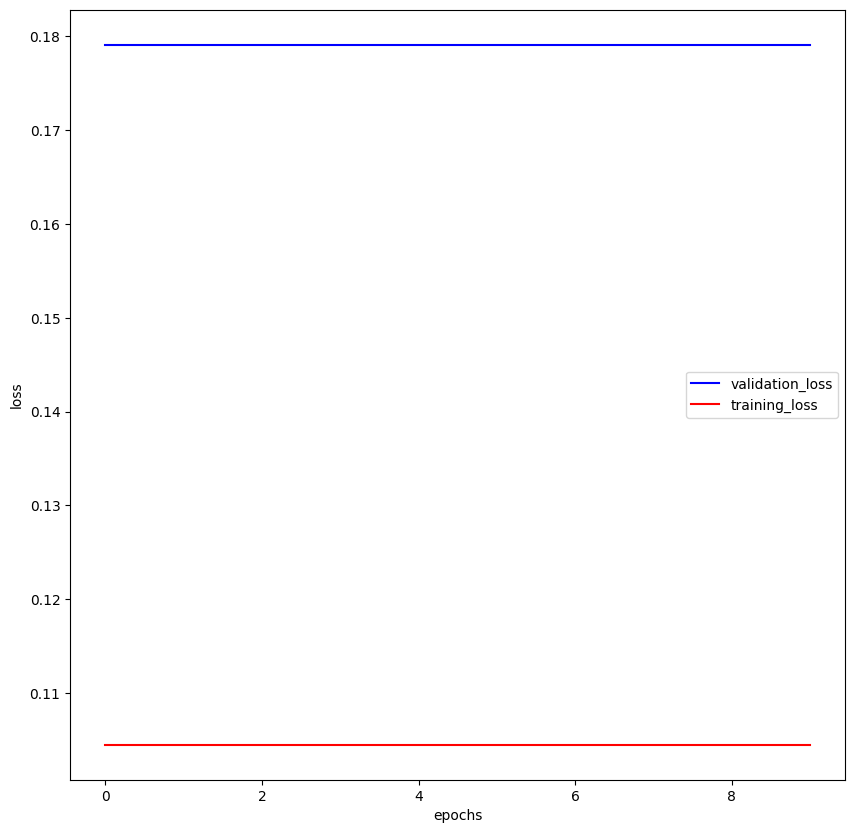

In [22]:
import matplotlib.pyplot as plt
print(modelfit_data.history.keys())
validation_loss=modelfit_data.history['val_loss']
training_loss=modelfit_data.history['val_accuracy']
plt.figure(figsize=(10,10))
plt.plot(validation_loss,label='validation_loss',color='blue')
plt.plot(training_loss,label='training_loss',color='red')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.1009 - loss: 0.1798


[0.1798001527786255, 0.10100000351667404]

ValueError: Exception encountered when calling Functional.call().

[1mInvalid input shape for input Tensor("functional_1_1/Cast:0", shape=(28, 28), dtype=float32). Expected shape (128, 28, 28, 1), but input has incompatible shape (28, 28)[0m

Arguments received by Functional.call():
  • inputs=tf.Tensor(shape=(28, 28), dtype=uint8)
  • training=False
  • mask=None

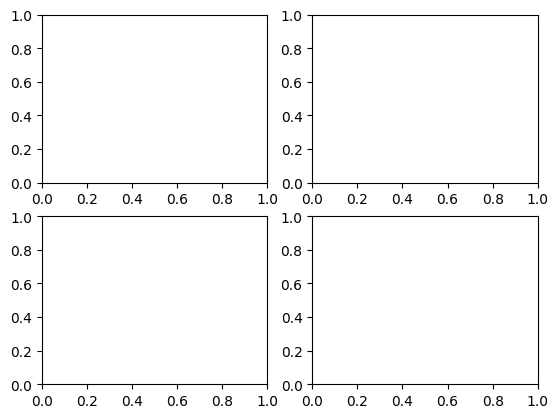

In [8]:
import matplotlib.pyplot as plt
figure,axes=plt.subplots(2,2)

for x in range(5):
    backbone.predict(x_test[x])
